In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [3]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

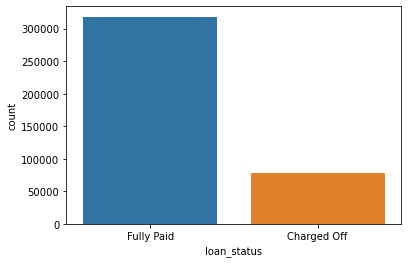

In [7]:
#Check is the dataset is balanced or inbalanced
sns.countplot(df['loan_status'])

In [8]:
#Thus most of the loans in the dataset have been paid off 

<AxesSubplot:xlabel='loan_amnt'>

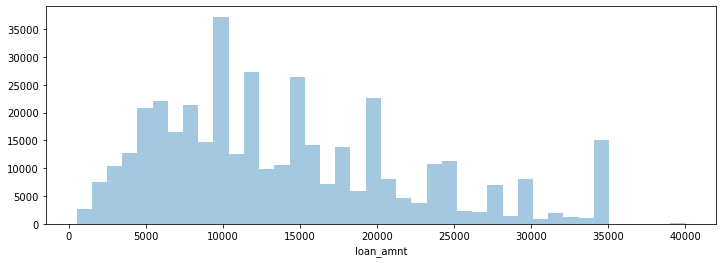

In [9]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)


<AxesSubplot:>

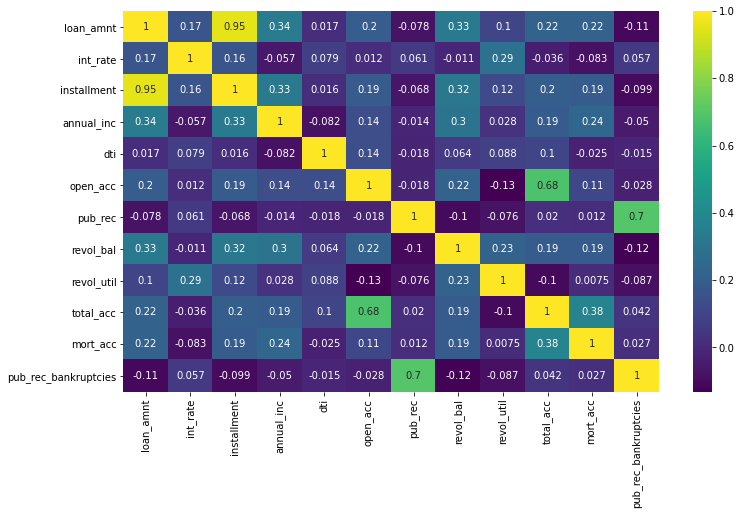

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

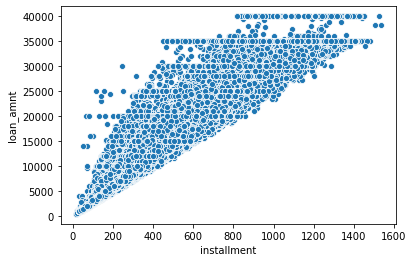

In [11]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

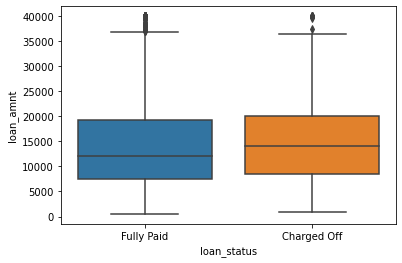

In [12]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [13]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [14]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [15]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

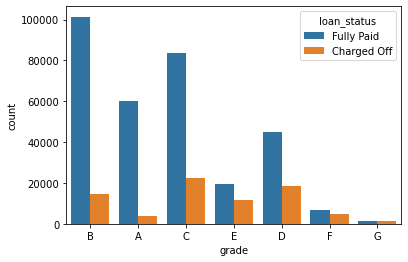

In [16]:
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

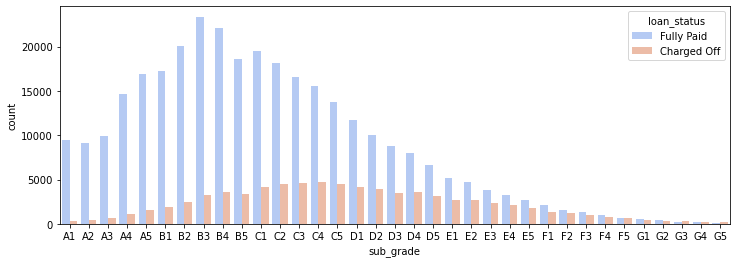

In [17]:
#Countplot per subgrade
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot('sub_grade',order=subgrade_order,palette='coolwarm',data=df,hue='loan_status')

In [18]:
#since the loan status is in strings let us create a new column to have a value 1 is the loan is fully paidoff 
#and 0 if it was charged off
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [20]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


<AxesSubplot:>

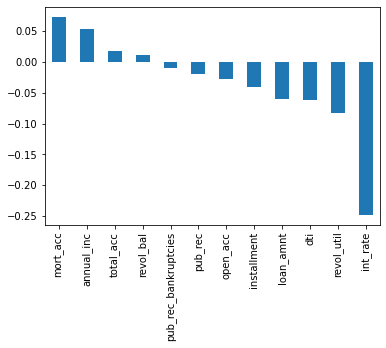

In [21]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values(ascending=False).plot(kind='bar')

## Data Preprocessing

In [22]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1


In [23]:
#let us drop the columns that are repetitive or have liitle to no information 

In [24]:
#Check emp title i.e. employee Title
df['emp_title'].nunique()

173105

In [25]:
#Thus there are 173105 unique number of titles . some of them might be repetitive like Registered Nurse and RN.
# But lets us drop them as they are lot of them and hold little information.
df = df.drop('emp_title',axis=1)

In [26]:
#let us now check the employment length filed/column
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [27]:
emp_length_order = ['< 1 year',
                     '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years',]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

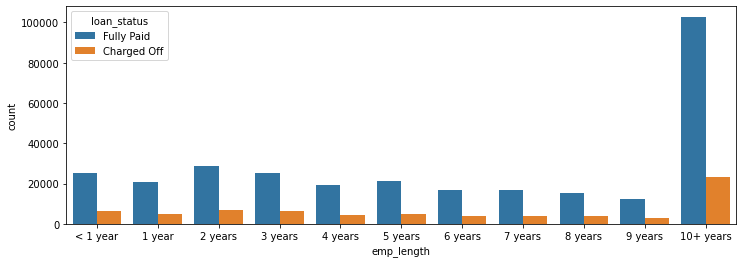

In [28]:
plt.figure(figsize=(12,4))

sns.countplot('emp_length',data=df,order=emp_length_order,hue='loan_status')

In [29]:
#Let us now calculate the percentage of loans paid vs charged off according to the length of employment
emp_co = df[df['loan_repaid'] == 0].groupby('emp_length').count()['loan_repaid']
emp_fp = df[df['loan_repaid'] == 1].groupby('emp_length').count()['loan_repaid']

In [30]:
emp_len = emp_co/(emp_co+emp_fp)

In [31]:
#the percentage of loan charged off wrt total loans availed according to various employement length level 
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_repaid, dtype: float64

<AxesSubplot:ylabel='emp_length'>

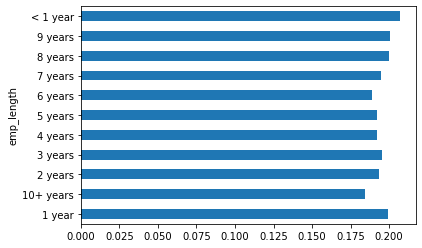

In [32]:
emp_len.plot(kind='barh')

In [33]:
#The overall percentage of people not paying the loan according to various employemnt length category is same and around
# 19 to 20 percent. Thus this field doesnot provide much value and can be dropped

In [34]:
df = df.drop('emp_length',axis=1)

In [35]:
#Check which columns/features have missing values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [36]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [37]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [38]:
#Title just describes the purpose column in short and is thus repetitive and can be dropped.
df = df.drop('title',axis=1)

In [39]:
#mort_acc column has many missing values , let us find its correlation with the other columns.
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [40]:
#total account seems to be most correlated and its logical.
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [41]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [42]:
total_acc_avg[50.0]

3.2208663819402075

In [43]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [44]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [45]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [46]:
#revol_util and pub_rec_bankruptcies have some missing values but they are less than 0.5 percent so we can drop these values.
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical columns 

In [47]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [48]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [49]:
#Thus they can be easily replaced
df['term'] = df['term'].apply(lambda x : int(x[:3]))

In [50]:
df['term'].unique()

array([36, 60], dtype=int64)

In [51]:
#Grade is part of sub_grade thus we can drop grade column
df = df.drop('grade',axis=1)

In [52]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [53]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [54]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [55]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [56]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [57]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [58]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [59]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [60]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [61]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [62]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [63]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
#extract the ZIP code from the address column

In [64]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [65]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [66]:
#issue_d is the issue date and since we will predict if the customer should be given a loan or not, this column will lead
#into data leakage while analysis , and for a new customer there will be no issue date column inless unmtill we give him a loan
# So drop the column 
df = df.drop('issue_d',axis=1)

In [67]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [68]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [69]:
df = df.drop('loan_status',axis=1)

## Train test split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [72]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
X_train.shape,X_test.shape

((316175, 78), (79044, 78))

In [74]:
y_train.shape,y_test.shape

((316175,), (79044,))

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [76]:
X_train = scaler.fit_transform(X_train)

In [77]:
X_test = scaler.transform(X_test)

## Model Creation

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm

In [79]:
model1 = Sequential()

model1.add(Dense(78,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(39,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(19,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1,activation='sigmoid'))

model1.compile(optimizer='adam',loss='binary_crossentropy')


In [80]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

In [81]:
model1.fit(X_train,y_train,batch_size=64,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/100
4941/4941 [==============================] - 7s 1ms/step - loss: 0.3105 - val_loss: 0.2633
Epoch 2/100
4941/4941 [==============================] - 7s 1ms/step - loss: 0.2770 - val_loss: 0.2628
Epoch 3/100
4941/4941 [==============================] - 7s 1ms/step - loss: 0.2746 - val_loss: 0.2624
Epoch 4/100
4941/4941 [==============================] - 7s 1ms/step - loss: 0.2742 - val_loss: 0.2610
Epoch 5/100
4941/4941 [==============================] - 7s 1ms/step - loss: 0.2735 - val_loss: 0.2604
Epoch 6/100
4941/4941 [==============================] - 7s 1ms/step - loss: 0.2734 - val_loss: 0.2611
Epoch 7/100
4941/4941 [==============================] - 7s 1ms/step - loss: 0.2725 - val_loss: 0.2612
Epoch 8/100
4941/4941 [==============================] - 7s 1ms/step - loss: 0.2722 - val_loss: 0.2618
Epoch 9/100
4941/4941 [==============================] - 7s 1ms/step - loss: 0.2724 - val_loss: 0.2618
Epoch 10/100
4941/4941 [==============================] - 7s 1ms/step - l

In [82]:
losses = pd.DataFrame(model1.history.history)

<AxesSubplot:>

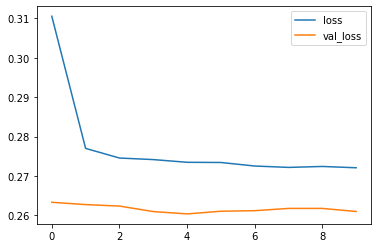

In [83]:
losses[['loss','val_loss']].plot()

In [84]:
from tensorflow.keras.models import load_model
model1.save('LendingCLubmodel.h5')

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
pred = model1.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [88]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [89]:
y_test.shape

(79044,)

In [90]:
y_test.sum()

63623

In [91]:
#thus the percentage of records that are charged of against those that have fully paid are 
(79044-63623)/79044

0.1950938717676231

In [92]:
#only 19.5 percent of the records have been charged off

In [93]:
80*0.2

16.0

In [94]:
20*0.8

16.0

In [95]:
X_test.shape

(79044, 78)

In [96]:
model2 = Sequential()

model2.add(Dense(78,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(39,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(19,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1,activation='sigmoid'))

model2.compile(optimizer='adam',loss='binary_crossentropy',loss_weights=[0.8,0.2])

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

In [98]:
model2.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/100
9881/9881 [==============================] - 35s 4ms/step - loss: 0.2360 - val_loss: 0.2107
Epoch 2/100
9881/9881 [==============================] - 34s 3ms/step - loss: 0.2159 - val_loss: 0.2105
Epoch 3/100
9881/9881 [==============================] - 34s 3ms/step - loss: 0.2149 - val_loss: 0.2094
Epoch 4/100
9881/9881 [==============================] - 35s 4ms/step - loss: 0.2143 - val_loss: 0.2099
Epoch 5/100
9881/9881 [==============================] - 36s 4ms/step - loss: 0.2141 - val_loss: 0.2097
Epoch 6/100
9881/9881 [==============================] - 36s 4ms/step - loss: 0.2135 - val_loss: 0.2090
Epoch 7/100
9881/9881 [==============================] - 36s 4ms/step - loss: 0.2131 - val_loss: 0.2088
Epoch 8/100
9881/9881 [==============================] - 35s 4ms/step - loss: 0.2132 - val_loss: 0.2088
Epoch 9/100
9881/9881 [==============================] - 35s 4ms/step - loss: 0.2134 - val_loss: 0.2095
Epoch 10/100
9881/9881 [==============================] - 36s 4m

In [99]:
pred2 = model2.predict_classes(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



### Thus by updating the loss weights the model has performed much better . 
### Next we will try to update the class weights and check the result.

In [100]:
model3 = Sequential()

model3.add(Dense(78,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(39,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(19,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1,activation='sigmoid'))

model3.compile(optimizer='adam',loss='binary_crossentropy')

early_stop3 = EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

model3.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop3],class_weight={0:4,1:1})

Epoch 1/100
9881/9881 [==============================] - 38s 4ms/step - loss: 0.6477 - val_loss: 0.3491
Epoch 2/100
9881/9881 [==============================] - 38s 4ms/step - loss: 0.5986 - val_loss: 0.3559
Epoch 3/100
9881/9881 [==============================] - 38s 4ms/step - loss: 0.5968 - val_loss: 0.3480
Epoch 4/100
9881/9881 [==============================] - 37s 4ms/step - loss: 0.5955 - val_loss: 0.3676
Epoch 5/100
9881/9881 [==============================] - 37s 4ms/step - loss: 0.5944 - val_loss: 0.3679
Epoch 6/100
9881/9881 [==============================] - 38s 4ms/step - loss: 0.5933 - val_loss: 0.3546
Epoch 7/100
9881/9881 [==============================] - 37s 4ms/step - loss: 0.5928 - val_loss: 0.3631
Epoch 8/100
9881/9881 [==============================] - 38s 4ms/step - loss: 0.5916 - val_loss: 0.3616
Epoch 00008: early stopping


<AxesSubplot:>

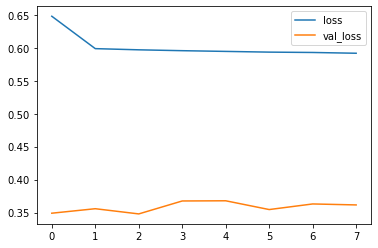

In [101]:
losses3=pd.DataFrame(model3.history.history)
losses3[['loss','val_loss']].plot()

In [102]:
pred3 = model3.predict_classes(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.48      0.81      0.60     15421
           1       0.94      0.79      0.86     63623

    accuracy                           0.79     79044
   macro avg       0.71      0.80      0.73     79044
weighted avg       0.85      0.79      0.81     79044



### Since the class weights have been incresed for Charged Off records the recall has been increased from
### 0.43 to 0.81 compared to model2. The precision is more in model2 as the weights for the loss was increased.
### let us try a combination of both of them

In [103]:
model4 = Sequential()

model4.add(Dense(78,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(39,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(19,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(1,activation='sigmoid'))

model4.compile(optimizer='adam',loss='binary_crossentropy',loss_weights=[0.8,0.2])

early_stop4 = EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

model4.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop4],class_weight={0:4,1:1})

Epoch 1/100
9881/9881 [==============================] - 39s 4ms/step - loss: 0.5268 - val_loss: 0.2903
Epoch 2/100
9881/9881 [==============================] - 38s 4ms/step - loss: 0.4841 - val_loss: 0.3113
Epoch 3/100
9881/9881 [==============================] - 3090s 313ms/step - loss: 0.4817 - val_loss: 0.2936
Epoch 4/100
9881/9881 [==============================] - 15s 2ms/step - loss: 0.4799 - val_loss: 0.2911
Epoch 5/100
9881/9881 [==============================] - 14s 1ms/step - loss: 0.4786 - val_loss: 0.2997
Epoch 6/100
9881/9881 [==============================] - 15s 2ms/step - loss: 0.4794 - val_loss: 0.2849
Epoch 7/100
9881/9881 [==============================] - 14s 1ms/step - loss: 0.4784 - val_loss: 0.3115
Epoch 8/100
9881/9881 [==============================] - 14s 1ms/step - loss: 0.4785 - val_loss: 0.2966
Epoch 9/100
9881/9881 [==============================] - 13s 1ms/step - loss: 0.4786 - val_loss: 0.2891
Epoch 10/100
9881/9881 [==============================] - 13

In [104]:
pred4 = model4.predict_classes(X_test)
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.49      0.80      0.60     15421
           1       0.94      0.80      0.86     63623

    accuracy                           0.80     79044
   macro avg       0.71      0.80      0.73     79044
weighted avg       0.85      0.80      0.81     79044



In [ ]:
pred5 = model4.predict_classes(X_test)
print(classification_report(y_test,pred5))
#thus training again has slightly worsened the model

### Thus it depends on the desired output which model to use and which hyperparametrs to tweak.
### I would prefer not to lend loan at all then to lend it to some one who wont pay back :P